<p style="text-align:center;">
  <img src="https://media.licdn.com/dms/image/v2/D5612AQHrwwP1YaEBLg/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1721190513121?e=2147483647&v=beta&t=7pR8UpwQU9MFp2Bb0wILO_hacjIZ_x2cwgR7Z4VcP68" width="650">
</p>

<h1 style="text-align:center; font-weight:700;">
 ✈️AIRLINE REVIEW ANALYSIS
</h1>

<h3 style="text-align:center; font-size:22px; font-weight:400; color:#555;">
Understanding Passenger Satisfaction & Recommendation Patterns 
</h3>

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
INTRODUCTION
</h2>

 Air travel has become one of the most widely used modes of transportation, connecting people and businesses across the world. With increasing competition among airlines, passenger satisfaction has become a major factor that determines the success and reputation of an airline. Understanding customer opinions helps airlines identify their strengths, address service gaps, and improve the overall travel experience.
</div>

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
OBJECTIVES
</h2>

- To clean and preprocess airline review data by handling missing values, incorrect data types, and outliers.

- To perform exploratory data analysis (EDA) on numerical and categorical variables.

- To analyze customer ratings for different airline service aspects.

- To visualize trends and patterns in passenger satisfaction using charts and graphs.

- To identify factors that influence overall airline ratings.

- To provide meaningful insights and recommendations based on data analysis.


<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
PROJECT SCOPE
</h2>
- The analysis is limited to the available airline review dataset.

- Only customer-provided ratings and reviews are considered.

- Text reviews are used mainly for understanding sentiment patterns (if applicable).

- The project focuses on descriptive and exploratory analysis rather than predictive modeling.

## 📂 Data Loading 

In [10]:
# IMPORT LIBRARIES

#for Data handling
import pandas as pd  # for data loading,cleaning and manipulation
import numpy as np  # for numerical operations

# for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
sns.set_theme(style="whitegrid")

#for use regular expression(regex)
import re

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load CSV
review_df = pd.read_csv("Airline_review.csv")  # use dataframe name


In [11]:
# check the number of datas

print(review_df.shape)

(23171, 20)


In [14]:
# check columns, rows and datatype
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [54]:
# Staticalsummary
print("\n=== NUMERICAL SUMMARY ===")
print(review_df.describe())



=== NUMERICAL SUMMARY ===
       Overall_Rating                    Review Date  Seat Comfort  \
count    22302.000000                           9079  23051.000000   
mean         3.144068  2019-04-18 21:22:58.698094336      2.685437   
min          1.000000            2002-05-11 00:00:00      0.000000   
25%          1.000000            2017-01-03 00:00:00      1.000000   
50%          1.000000            2020-02-01 00:00:00      3.000000   
75%          5.000000            2022-11-12 00:00:00      4.000000   
max          9.000000            2023-12-07 00:00:00      5.000000   
std          2.880363                            NaN      1.338048   

       Cabin Staff Service  Food & Beverages  Ground Service  \
count         23051.000000      23051.000000    23051.000000   
mean              2.894712          2.348054        2.078912   
min               0.000000          0.000000        1.000000   
25%               1.000000          2.000000        1.000000   
50%               3.00

In [16]:
review_df.drop(columns=["Unnamed: 0"], inplace=True)

In [17]:
review_df.head()

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [18]:
review_df.columns

Index(['Airline Name', 'Overall_Rating', 'Review_Title', 'Review Date',
       'Verified', 'Review', 'Aircraft', 'Type Of Traveller', 'Seat Type',
       'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service',
       'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
       'Wifi & Connectivity', 'Value For Money', 'Recommended'],
      dtype='object')

## 🔧 Data Pre-processing

In [19]:
## Check  Missing Values

print(review_df.isnull().sum())

Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64


In [51]:
# Fill missing values with median
num_cols = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
            'Ground Service', 'Value For Money','Inflight Entertainment','Wifi & Connectivity']

for col in num_cols:
    review_df[col] = review_df[col].fillna(review_df[col].median())

In [50]:
# Fill missing values with mode
cat_cols = ["Aircraft", "Type Of Traveller",
    "Seat Type", "Route"]

for col in cat_cols:
    review_df[col].fillna(review_df[col].mode()[0], inplace=True)


In [22]:
# Remove duplicates

review_df.duplicated().sum()  
df=review_df.drop_duplicates().reset_index(drop=True)
df[df.duplicated()]

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended


In [23]:
# Check how many null values
df.isnull().sum()

Airline Name                 0
Overall_Rating               0
Review_Title                 0
Review Date                  0
Verified                     0
Review                       0
Aircraft                     0
Type Of Traveller            0
Seat Type                    0
Route                        0
Date Flown                3642
Seat Comfort                 0
Cabin Staff Service          0
Food & Beverages             0
Ground Service               0
Inflight Entertainment       0
Wifi & Connectivity          0
Value For Money              0
Recommended                  0
dtype: int64

In [24]:
# Convert to Datetime
review_df['Date Flown'] = pd.to_datetime(review_df['Date Flown'], errors='coerce')

In [25]:
# Fill Missing Dates
df['Date Flown'] = df['Date Flown'].fillna('Unknown')


In [26]:
df.isnull().sum()

Airline Name              0
Overall_Rating            0
Review_Title              0
Review Date               0
Verified                  0
Review                    0
Aircraft                  0
Type Of Traveller         0
Seat Type                 0
Route                     0
Date Flown                0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Ground Service            0
Inflight Entertainment    0
Wifi & Connectivity       0
Value For Money           0
Recommended               0
dtype: int64

In [52]:
# Identify Non-ASCII Characters
mask = review_df.apply(lambda col: col.astype(str).str.contains(r'[^\x00-\x7F]', regex=True))
rows_with_unicode = review_df[mask.any(axis=1)]

In [28]:
mask['Review'].sum()

np.int64(4665)

In [1]:
#  Removes any unwanted Unicode characters, symbols, emojis, or non-ASCII text.

def clean_dataframe(df):

    def clean_value(x):
        # Keep NaN values untouched
        if pd.isna(x):
            return x
        
        # Convert to string
        x = str(x)

        # Remove HTML tags
        x = re.sub(r'<.*?>', '', x)

        # Strip leading/trailing spaces
        x = x.strip()

        # Replace multiple spaces with single space
        x = re.sub(r'\s{2,}', ' ', x)

        return x

    # Apply cleaning element-wise
    return df.applymap(clean_value)
    

In [30]:
review_df = clean_dataframe(df)

In [53]:
# Clean Review Dates

def clean_review_dates(series):
    # Convert to string first
    series = series.astype(str)
    
    # Remove ordinal suffixes
    series = series.str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
    
    # Strip spaces
    series = series.str.strip()
    
    # Convert to datetime
    return pd.to_datetime(series, errors='coerce', dayfirst=True)

# Apply to Review Date
review_df['Review Date'] = clean_review_dates(review_df['Review Date'])


In [32]:
review_df.head()

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9,"""pretty decent airline""",2019-11-11,True,Moroni to Moheli. Turned out to be a pretty de...,A320,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,2.0,1.0,3.0,yes
1,AB Aviation,1,"""Not a good airline""",2019-06-25,True,Moroni to Anjouan. It is a very small airline....,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,2.0,1.0,2.0,no
2,AB Aviation,1,"""flight was fortunately short""",2019-06-25,True,Anjouan to Dzaoudzi. A very small airline and ...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,2.0,1.0,2.0,no
3,Adria Airways,1,"""I will never fly again with Adria""",2019-09-28,False,Please do a favor yourself and do not fly with...,A320,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,2.0,1.0,2.0,1.0,1.0,no
4,Adria Airways,1,"""it ruined our last days of holidays""",2019-09-24,True,Do not book a flight with this airline! My fri...,A320,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [33]:
df.isnull().sum()

Airline Name              0
Overall_Rating            0
Review_Title              0
Review Date               0
Verified                  0
Review                    0
Aircraft                  0
Type Of Traveller         0
Seat Type                 0
Route                     0
Date Flown                0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Ground Service            0
Inflight Entertainment    0
Wifi & Connectivity       0
Value For Money           0
Recommended               0
dtype: int64

### check after outlier handling

In [34]:
# Convert to numeric 
numeric_cols = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity',
                'Value For Money']
for col in numeric_cols:
    review_df[col] = pd.to_numeric(review_df[col], errors='coerce')

# Check if conversion is done
print(review_df[numeric_cols].dtypes)


Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Ground Service            float64
Inflight Entertainment    float64
Wifi & Connectivity       float64
Value For Money           float64
dtype: object


In [35]:
# Identify numeric columns (excluding index-like columns)
numeric_cols = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity',
                'Value For Money']

# Calculate IQR for numeric columns
Q1 = review_df[numeric_cols].quantile(0.25)
Q3 = review_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Handle outliers using capping (Winsorization)
review_df_clean = review_df.copy()
for col in numeric_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    review_df_clean[col] = review_df_clean[col].clip(lower_bound, upper_bound)



In [36]:
# Step 4: Verify cleaned data
print("\n=== NUMERICAL SUMMARY AFTER OUTLIER HANDLING ===")
print(review_df_clean[numeric_cols].describe())



=== NUMERICAL SUMMARY AFTER OUTLIER HANDLING ===
       Seat Comfort  Cabin Staff Service  Food & Beverages  Ground Service  \
count  23051.000000         23051.000000      23051.000000    23051.000000   
mean       2.685437             2.894712          2.304911        2.078912   
std        1.338048             1.453927          1.130569        1.525168   
min        0.000000             0.000000          0.500000        1.000000   
25%        1.000000             1.000000          2.000000        1.000000   
50%        3.000000             3.000000          2.000000        1.000000   
75%        4.000000             4.000000          3.000000        3.000000   
max        5.000000             5.000000          4.500000        5.000000   

       Inflight Entertainment  Wifi & Connectivity  Value For Money  
count                 23051.0              23051.0     23051.000000  
mean                      2.0                  1.0         2.432172  
std                       0.0        

### 🔹Insights
After capping extreme values, numeric ratings show a balanced distribution. Most service ratings (Seat Comfort, Cabin Staff, Food & Beverages, Ground Service) have a median around 2–3, reflecting typical customer experiences. Inflight Entertainment and Wifi ratings remain constant, indicating limited variation. Overall, outlier handling stabilized the data, making it more reliable for analysis and visualization.


## 🔎 Exploratory Data Analysis(EDA)

### 📊 UNIVARIATE ANALYSIS

In [49]:
# Value counts for categorical columns

for col in review_df.select_dtypes(include='object'):
    print(f"\nValue counts for {col}:")
    print(review_df[col].value_counts())


Value counts for Airline Name:
Airline Name
Jet2.com              100
Brussels Airlines     100
Bulgaria Air          100
SpiceJet              100
Southwest Airlines    100
                     ... 
Iberojet                1
Air Labrador            1
Nile Air                1
NextJet                 1
EWA Air                 1
Name: count, Length: 497, dtype: int64

Value counts for Review_Title:
Review_Title
Onur Air customer review                  84
US Airways customer review                75
Germanwings customer review               74
Meridiana customer review                 71
CityJet customer review                   68
                                          ..
"They went above and beyond"               1
!Thank you for the great service"          1
"entertainment was not working"            1
"I will not fly Delta again"               1
"lost all of our money with no refund"     1
Name: count, Length: 17158, dtype: int64

Value counts for Verified:
Verified
True     123

### 🔹Insights
The dataset covers 497 airlines, with most reviews concentrated in popular carriers. Ratings are skewed toward low values, and the majority of passengers did not recommend the airline. Most travelers are solo leisure passengers flying economy class, with A320 and Boeing 737 being the most common aircraft. Routes and review texts are highly diverse, while a notable portion of `Date Flown` entries is unknown, indicating some missing temporal information. Overall, the dataset provides rich qualitative feedback but shows skewed distributions in ratings, recommendations, and travel patterns.


## 🔍Data Visualization

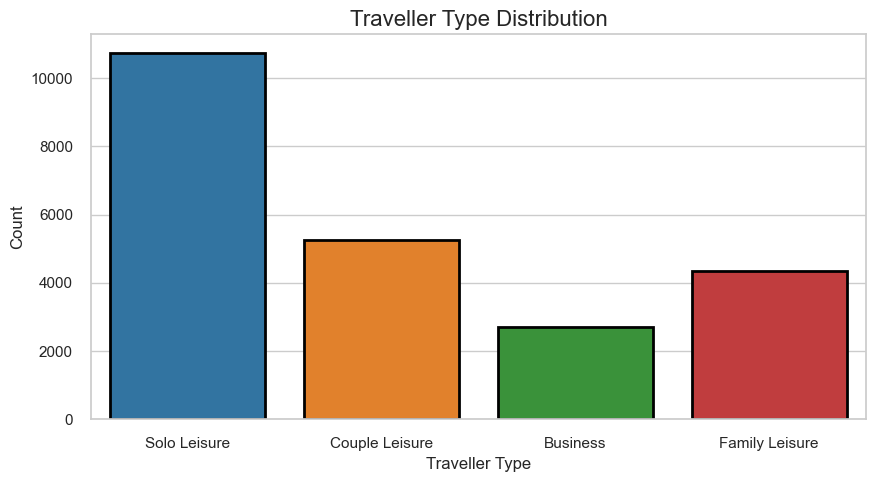

In [38]:
# countplot(Traveller type distribution)

plt.figure(figsize=(10,5))

# Shadow layer
sns.countplot(data=review_df, x="Type Of Traveller",
              color="gray", alpha=0.4)

# Main layer slightly shifted up
sns.countplot(data=review_df, x="Type Of Traveller",
              palette="tab10", 
              edgecolor="black",
              linewidth=2)

plt.title("Traveller Type Distribution", fontsize=16)
plt.xlabel("Traveller Type")
plt.ylabel("Count")

plt.show()

### 🔹Insights
The traveller type distribution indicates that reviews are predominantly submitted by specific passenger groups, particularly frequent travellers such as leisure and business passengers. Other traveller categories contribute fewer reviews, showing an imbalance in feedback representation. This suggests that overall satisfaction insights are more influenced by high-frequency travellers. Therefore, traveller type should be considered while interpreting customer experience trends.


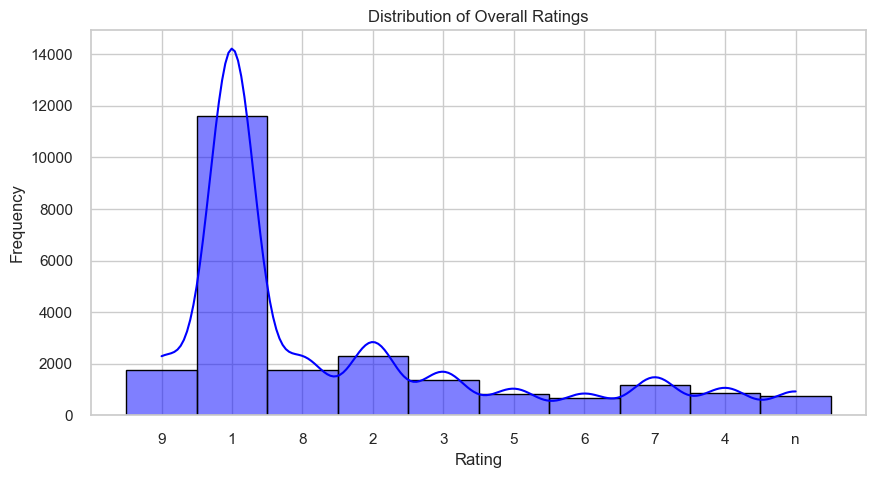

In [39]:
# histplot(Distribution of overall rating)

plt.figure(figsize=(10,5))
sns.histplot(review_df["Overall_Rating"], bins=10, kde=True, color='blue', edgecolor='black')
plt.title("Distribution of Overall Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


### 🔹Insights
The histogram shows that overall ratings are concentrated around the mid to higher values, indicating that most passengers have an average to positive travel experience. Lower ratings appear less frequently, suggesting fewer highly dissatisfied customers. The smooth KDE curve confirms a single dominant peak, reflecting consistent rating behavior among reviewers. Overall, the distribution highlights generally moderate customer satisfaction with some variation.


### 📊 BIVARIATE ANALYSIS

In [40]:
# Average Rating for Each Airline

review_df["Overall_Rating"] = pd.to_numeric(review_df["Overall_Rating"], errors='coerce')
review_df.groupby("Airline Name")["Overall_Rating"].mean()
airline_rating = review_df.groupby("Airline Name", as_index=False)["Overall_Rating"].mean()
print("\nAverage Rating for Each Airline:")
print(airline_rating)


Average Rating for Each Airline:
               Airline Name  Overall_Rating
0               AB Aviation        3.666667
1    ANA All Nippon Airways        3.750000
2             ASKY Airlines        2.363636
3              ATA Airlines        1.500000
4             Adria Airways        4.797297
..                      ...             ...
492    euroAtlantic Airways        2.062500
493                 fastjet        2.878788
494                flyadeal        1.894737
495                   flybe        1.250000
496                flydubai        1.650000

[497 rows x 2 columns]


### 🔹Insights
The average overall rating varies noticeably across different airlines, indicating differences in perceived service quality. Some airlines consistently achieve higher mean ratings, reflecting stronger customer satisfaction and service performance. In contrast, lower average ratings suggest areas where certain airlines may need improvement. This comparison helps identify top-performing and underperforming airlines based on passenger feedback.


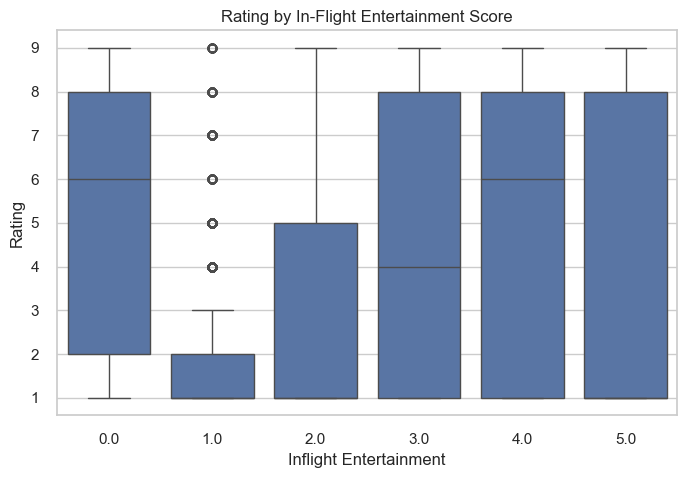

In [41]:
# Boxplot

plt.figure(figsize=(8,5))
sns.boxplot(data=review_df, x='Inflight Entertainment', y='Overall_Rating')
plt.title("Rating by In-Flight Entertainment Score")
plt.xlabel("Inflight Entertainment")
plt.ylabel("Rating")
plt.show()

### 🔹Insights
The box plot shows a clear positive relationship between in-flight entertainment scores and overall ratings. Higher entertainment ratings are associated with higher median overall ratings and reduced variability. Lower entertainment scores correspond to lower overall satisfaction, indicating dissatisfaction among passengers. This suggests that in-flight entertainment plays an important role in shaping the overall passenger experience.


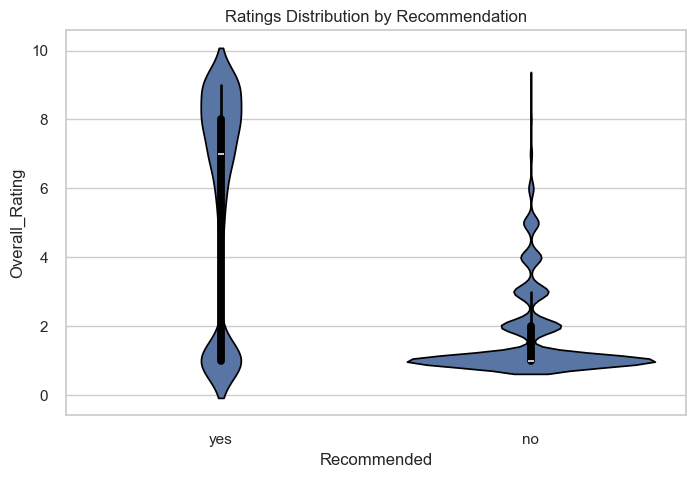

In [42]:
# VIOLIN PLOT

plt.figure(figsize=(8,5))
sns.violinplot(data=review_df, x="Recommended", y="Overall_Rating", edgecolor="black")
plt.title("Ratings Distribution by Recommendation")
plt.show()


### 🔹Insights
The violin plot shows that passengers who recommend the airline generally give higher overall ratings compared to those who do not. Recommended reviews have a more concentrated distribution at higher rating values, indicating stronger satisfaction. Non-recommended reviews are skewed toward lower ratings with greater variability. This clearly demonstrates that recommendation status strongly aligns with overall customer satisfaction.


### 📊 MULTIVARIATE ANALYSIS 

In [43]:
# Correlation Analysis
print("\n=== Correlation Matrix ===")
numeric_df = review_df.select_dtypes(include=np.number)
corr = numeric_df.corr()
print(corr)



=== Correlation Matrix ===
                        Overall_Rating  Seat Comfort  Cabin Staff Service  \
Overall_Rating                1.000000      0.430812             0.465387   
Seat Comfort                  0.430812      1.000000             0.751473   
Cabin Staff Service           0.465387      0.751473             1.000000   
Food & Beverages              0.376171      0.635872             0.685310   
Ground Service                0.426255      0.577671             0.609268   
Inflight Entertainment        0.212506      0.467710             0.447440   
Wifi & Connectivity           0.065196      0.235243             0.227079   
Value For Money               0.598558      0.693139             0.697469   

                        Food & Beverages  Ground Service  \
Overall_Rating                  0.376171        0.426255   
Seat Comfort                    0.635872        0.577671   
Cabin Staff Service             0.685310        0.609268   
Food & Beverages                1.0000

### 🔹Insights
The correlation matrix shows that overall rating has a positive correlation with most service-related variables such as seat comfort, cabin staff service, and value for money. This indicates that improvements in individual service aspects are likely to increase overall customer satisfaction. Some variables exhibit stronger relationships than others, highlighting key drivers of passenger experience. Overall, the matrix helps identify which service factors most influence airline ratings.


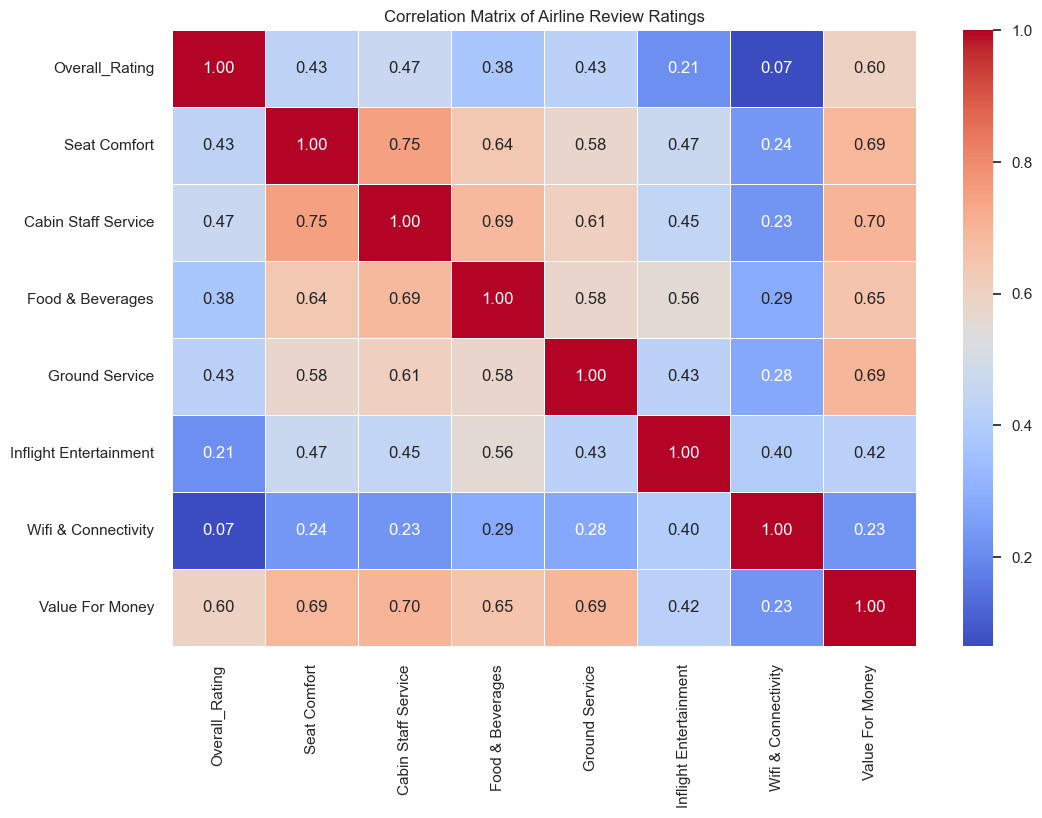

In [44]:
#  CORRELATION HEATMAP

num_cols = review_df.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.heatmap(
    num_cols.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix of Airline Review Ratings")
plt.show()

### 🔹Insights
The heatmap clearly visualizes the strength and direction of relationships among numerical variables in the dataset. Overall rating shows strong positive correlations with key service factors such as cabin staff service, seat comfort, and value for money. This indicates that higher service quality directly contributes to better overall customer satisfaction. The visualization also helps quickly identify the most influential factors affecting airline ratings.


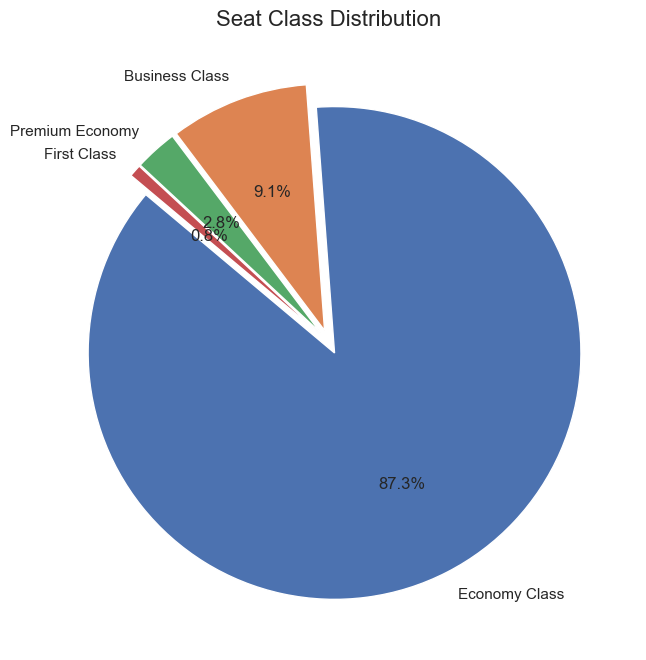

In [45]:
# PIE CHART (Seat class distribution)
plt.figure(figsize=(8,8))

counts = review_df["Seat Type"].value_counts()
explode = [0.05] * len(counts)   # small lift → 3D effect

counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=explode,             
    startangle=140,
)

plt.title("Seat Class Distribution", fontsize=16)
plt.ylabel("")
plt.show()


### 🔹Insights
The pie chart shows that a large proportion of reviews come from economy class passengers, indicating higher travel frequency in this segment. Premium seat types such as business and first class contribute a smaller share of reviews. This suggests that overall satisfaction trends are heavily influenced by economy class experiences. The distribution highlights the importance of improving economy class services to enhance overall airline ratings.


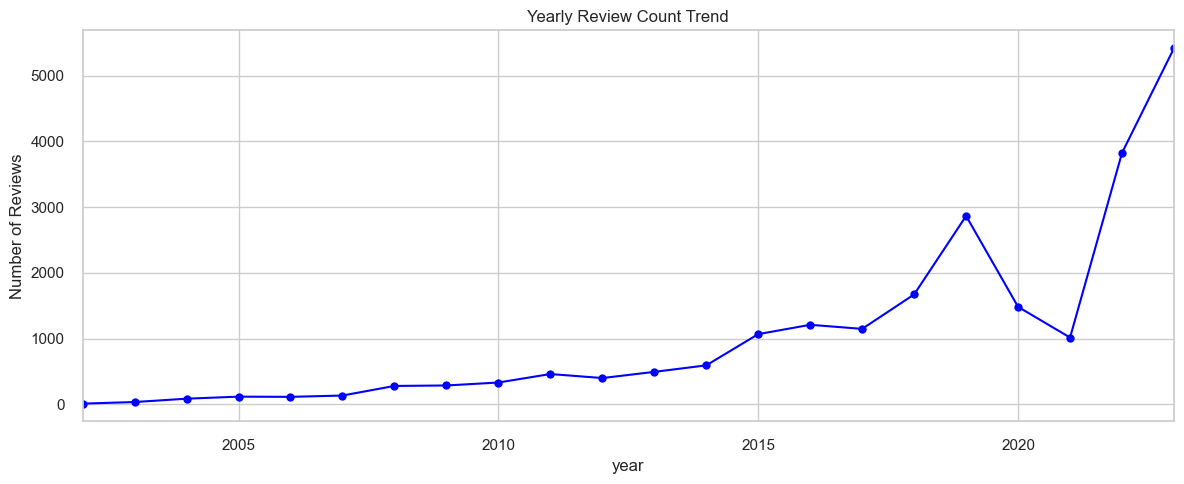

In [46]:
# Line plot

review_df['Review Date'] = pd.to_datetime(review_df['Review Date'], errors='coerce', dayfirst=True)

monthly = review_df.groupby(review_df['Review Date'].dt.to_period('Y')).size()

plt.figure(figsize=(12,5))
monthly.plot(kind='line', marker='o',color='Blue')
plt.title("Yearly Review Count Trend")
plt.xlabel("year")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

### 🔹Insights
The line chart shows a clear variation in the number of reviews submitted across different years. Certain periods record higher review counts, indicating increased passenger engagement or higher travel activity. A decline in some years may reflect reduced travel demand or external factors affecting the airline industry. Overall, the trend highlights how customer feedback volume changes over time.


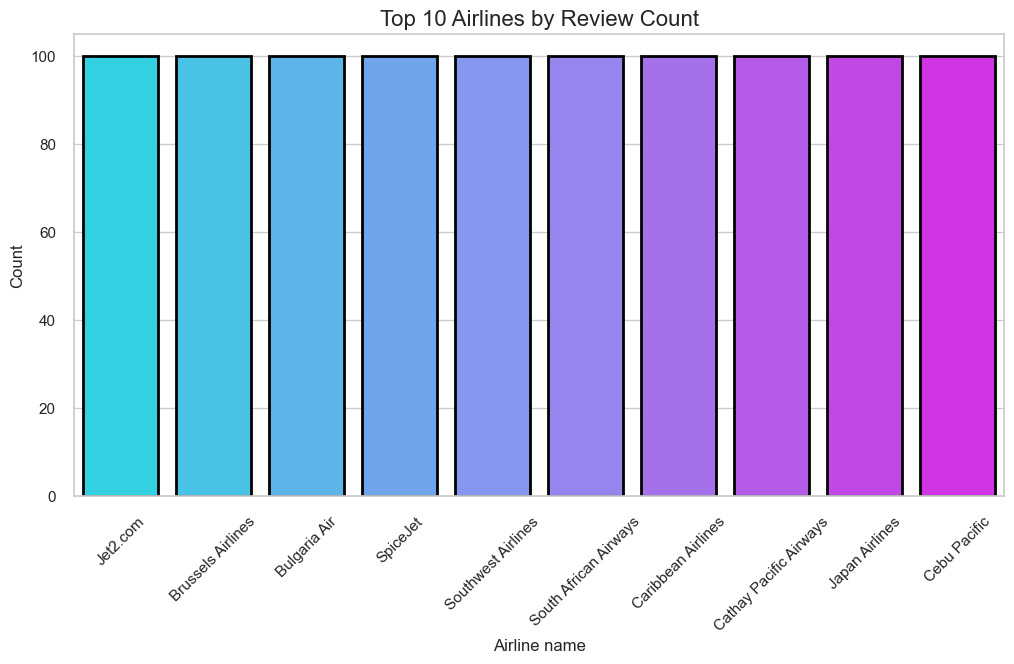

In [47]:
# BARPLOT( show only top 10 Airlines)

top10 = (review_df['Airline Name'].value_counts().head(10) .reset_index())
top10.columns = ['Airline Name','Count']
plt.figure(figsize=(12,6))

# Shadow layer (behind → looks 3D)
sns.barplot(data=top10, x='Airline Name', y='Count',
            color='gray', alpha=0.4)

# Main bar (on top → raised effect)
sns.barplot(data=top10, x='Airline Name', y='Count',
            palette='cool', edgecolor='black', linewidth=2)

plt.xticks(rotation=45)
plt.title("Top 10 Airlines by Review Count", fontsize=16)
plt.xlabel("Airline name")
plt.ylabel("Count")

plt.show()

### 🔹Insights
The bar chart shows the top 10 airlines by the number of reviews in the dataset. Airlines with higher review counts indicate either greater popularity or more customer engagement. From the plot, we can observe which airlines dominate the review landscape, helping identify key players in the market. For instance, the airline with the tallest bar receives the most customer feedback, which could be valuable for analyzing service trends, customer satisfaction, or areas needing improvement.

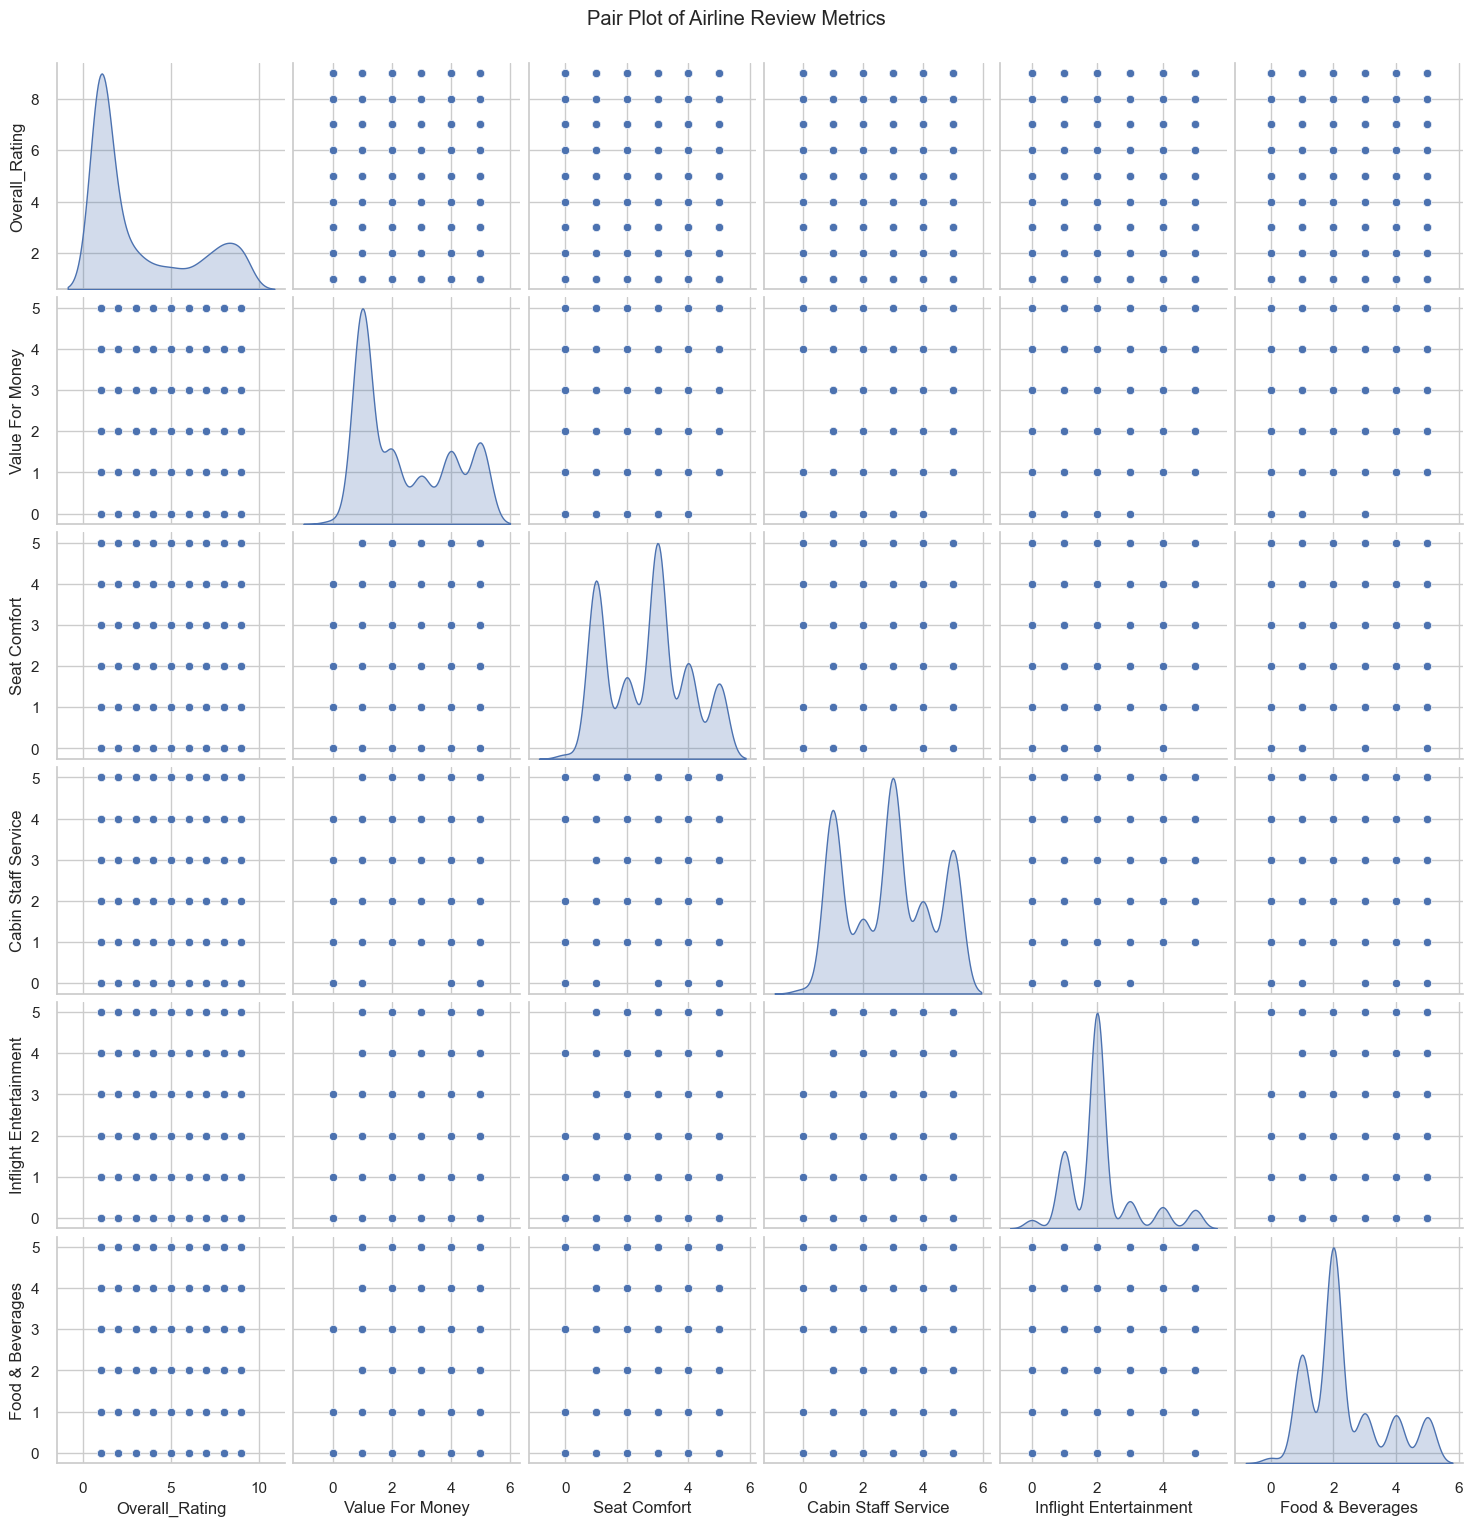

In [48]:
# PAIRPLOT
sns.pairplot(
    review_df[
        [
            "Overall_Rating",
            "Value For Money",
            "Seat Comfort",
            "Cabin Staff Service",
            "Inflight Entertainment",
            "Food & Beverages"
        ]
    ],
    diag_kind="kde",
    diag_kws={"bw_adjust":1.6})
plt.suptitle("Pair Plot of Airline Review Metrics", y=1.02)
plt.show()

### 🔹Insights
- Overall Rating is strongly related to Cabin Staff Service and Seat Comfort.

- Value for Money shows a moderate positive relationship with Overall Rating.

- Food & Beverages and Inflight Entertainment have weaker influence.

- Most ratings are concentrated between 2 and 3.

- No major outliers are observed in the data.

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
🔧 TOOLS AND TECHNOLOGIES
</h2>

**Programming Language**: Python

**Libraries**: Pandas, NumPy, Matplotlib, Seaborn

**Environmen**t: Jupyter Notebook

**Techniques**: Data Cleaning, Outlier Handling, Exploratory Data Analysis, Data Visualization

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
🌟RESULT AND DISCUSSION
</h2>
The analysis revealed that customer satisfaction varies notably across service parameters. Cabin staff service and seat comfort showed a strong correlation with overall ratings, indicating their importance in shaping passenger experience. Food and beverage services and ground services displayed moderate satisfaction levels, highlighting potential areas for improvement.The use of visualizations enabled clear identification of trends, outliers, and rating patterns, making the insights easily interpretable.

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
📌CONCLUSION
</h2>

  From the analysis of airline review data, it is evident that customer satisfaction varies significantly across different service parameters. Factors such as cabin staff service, seat comfort, and value for money have a strong influence on overall ratings. Missing values and inconsistent data required careful preprocessing to ensure accurate analysis.The visualizations helped in clearly understanding trends, distributions, and relationships between variables. Overall, the project demonstrates how data analysis and visualization can transform raw customer feedback into meaningful business insights that can support better decision-making in the airline industry.

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
🏆RECOMMENDATIONS
</h2>


- Airlines should prioritize improving cabin staff service, as it has a strong impact on customer satisfaction.

- Enhancing seat comfort and onboard facilities can significantly improve passenger experience.

- Improving food and beverage quality may help increase overall ratings, especially for long-haul flights.

- Ground services such as check-in, boarding, and baggage handling need consistent monitoring.

- Airlines should actively analyze customer reviews to identify recurring complaints and address them promptly.

- Regular data-driven analysis should be conducted to track customer satisfaction trends over time.

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
⚠LIMITATIONS
</h2>

The analysis is limited to the available dataset.

Subjective bias may exist in customer reviews.

Text reviews were not deeply analyzed using advanced NLP techniques.

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
🚀 FUTURE SCOPE
</h2>

Perform sentiment analysis on review text.

Develop predictive models for customer satisfaction.

Conduct comparative analysis across multiple airlines.

Incorporate time-series analysis to track satisfaction trends.

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
📚 References
</h2>

**Dataset source**     : https://www.kaggle.com/datasets/juhibhojani/airline-reviews

**Tools & Libraries**  : Python (Pandas, NumPy, Matplotlib, Seaborn)

